In [2]:
%load_ext autoreload

In [3]:
cd ..

/home/mars/Documents/src_aiai


In [4]:
%autoreload 2
%aimport src.visualisation

In [5]:
import numpy as np

In [6]:
from src.data import load_M51
from src.sampling.uv_sampling import spider_sampling
from src.operators.measurement import NUFFT_op
from src.solvers import PrimalDual_l1_constrained
from src.visualisation import compare
from src.operators.dictionary import wavelet_basis

In [7]:
# data + operator

In [8]:
uv = spider_sampling()
m_op = NUFFT_op(uv)

In [18]:
x_true = load_M51()

y0 = m_op.dir_op(x_true)
ISNR = 30 #dB
sigma = np.sqrt(np.mean(np.abs(y0)**2)) * 10**(-ISNR/20)
noise = np.random.normal(0, sigma, y0.shape) + 1j * np.random.normal(0, sigma, y0.shape)
y = y0 #+ noise

x_dirty = m_op.adj_op(y)
noise_val = np.std((m_op.adj_op(noise)))

w = np.linalg.norm(uv, axis=1)
x_f = m_op.adj_op(y*w/w.max())

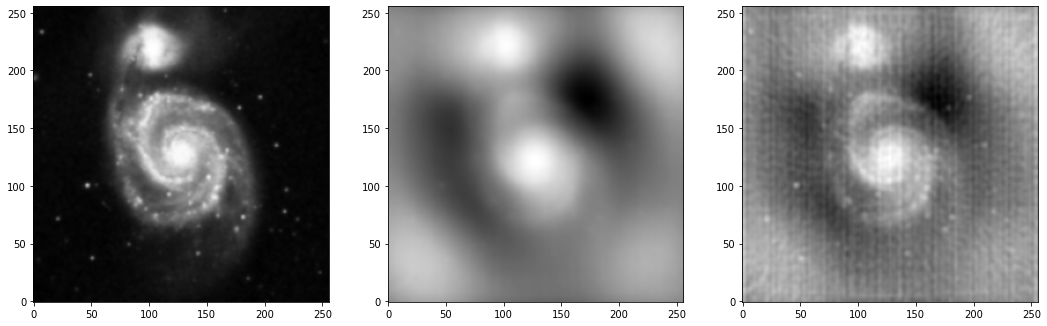

In [19]:
compare([x_true.real, x_dirty.real, x_f.real])

In [22]:
psi = wavelet_basis(x_dirty.shape)
solver = PrimalDual_l1_constrained(m_op=m_op, psi=psi, beta=1e-2,
    options={
        'tol': 1e-5, 'iter': 5000, 'update_iter': 50, 
        'record_iters': False, 'positivity': True, 'real': True})

{'tol': 1e-05, 'iter': 5000, 'update_iter': 50, 'record_iters': False, 'positivity': True, 'real': True}


In [23]:
z, diag = solver.solve(y, m_op, noise_val)

2021-05-18 12:17:08,135 - Optimus Primal - INFO - Starting Power method
2021-05-18 12:17:08,180 - Optimus Primal - INFO - [Power Method] iter = 1, tol = 0.0
2021-05-18 12:17:08,371 - Optimus Primal - INFO - [Power Method] Converged with norm= 5.732232, iter = 11, tol = 0.0009873847
2021-05-18 12:17:08,418 - Optimus Primal - INFO - Running Forward Backward Primal Dual
2021-05-18 12:17:08,509 - Optimus Primal - INFO - [Primal Dual] 0 out of 5000 iterations, tol = 0.630446
2021-05-18 12:17:12,415 - Optimus Primal - INFO - [Primal Dual] 50 out of 5000 iterations, tol = 0.018847
2021-05-18 12:17:16,388 - Optimus Primal - INFO - [Primal Dual] 100 out of 5000 iterations, tol = 0.010050
2021-05-18 12:17:20,566 - Optimus Primal - INFO - [Primal Dual] 150 out of 5000 iterations, tol = 0.003344
2021-05-18 12:17:25,224 - Optimus Primal - INFO - [Primal Dual] 200 out of 5000 iterations, tol = 0.008025
2021-05-18 12:17:29,924 - Optimus Primal - INFO - [Primal Dual] 250 out of 5000 iterations, tol = 

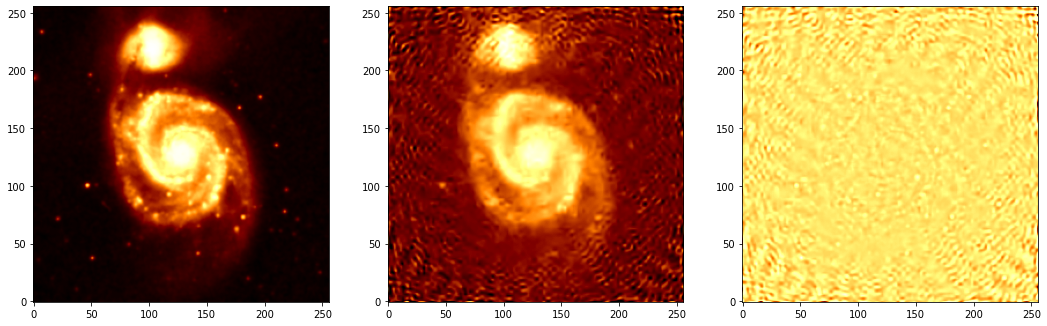

In [19]:
compare([x_true, z.real, x_true-z.real])